<a href="https://colab.research.google.com/github/FerDelbo/imersao_dados_alura/blob/main/aulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 1 - Explorando dados com o Pandas**


Palavra chave: Pandas

In [67]:
import pandas as pd

In [68]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [69]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [71]:
df.describe() # Tras as estatisticas descritivas

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [72]:
df.shape # Quantidade de linhas, quantidade de colunas

(133349, 11)

In [73]:
# Formatação
linhas = df.shape[0]
colunas = df.shape[1]
print(f'Total de linhas: {linhas}')
print(f'Total de colunas: {colunas}')

Total de linhas: 133349
Total de colunas: 11


In [74]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [75]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'nivel_experiencia',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)

df.columns  # Confirma que renomeou corretamente

Index(['ano', 'nivel_experiencia', 'contrato', 'cargo', 'salario', 'moeda',
       'usd', 'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [76]:
df.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


**Explicação dos niveis de experiencia**

SE -> Senior

MI -> Mediun (Pleno)

EN -> Entry (Iniciante)

EX -> Executivo



In [77]:
df['nivel_experiencia'].value_counts()

,count
nivel_experiencia,
SE,77241
MI,40465
EN,12443
EX,3200


**Explicação de tipos de contrato**

FT -> Full Time (Tempo integral)

CT -> Contrato temporario

PT -> Part Time (Meio periodo)

FL -> Free lance

In [78]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


**Explicação da variavel remoto**

0 -> Presencial

100 -> Remoto

50 -> Hibrido

In [79]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


**Explicação para variavel tamanho_empresa**

M -> Medium (Media)

L -> Large (Grande)

s -> Small (Pequeno)

In [80]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


## Renomeação das siglas

In [81]:
# replace faz a modificação das siglas
niveis = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}
df['nivel_experiencia'] = df['nivel_experiencia'].replace(niveis)
df['nivel_experiencia'].value_counts()

,count
nivel_experiencia,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [82]:
siglas = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato Temporario',
    'PT': 'Meio Periodo',
    'FL': 'Freelance'
}
df['contrato'] = df['contrato'].replace(siglas)
df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato Temporario,394
Meio Periodo,376
Freelance,16


In [83]:
tamanho = {
    'M': 'Media',
    'L': 'Grande',
    'S': 'Pequeno'
}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Media,129561
Grande,3574
Pequeno,214


In [84]:
remoto = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Hibrido'
}
df['remoto'] = df['remoto'].replace(remoto)
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [85]:
df.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [86]:
df.describe(include='object') # Utiliza as variaveis categoricas(qualitativas)

,nivel_experiencia,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [87]:
df.describe() # Variaveis quantitativas

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# **Aula 2 - Tratamento de dados**

Palavra chave: Print


In [88]:
df.isnull()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [89]:
df.isnull().sum() # Verifica se os campos nulos

,0
ano,10
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [90]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [91]:
df[df.isnull().any(axis=1)]

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [92]:
filtro = df['ano'].isnull()
df[filtro]

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [93]:
# Criando um DataFrame para testes
import numpy as np
df_salario = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})
# Substituir pela media
df_salario['salario_media'] = df_salario['salario'].fillna(df_salario['salario'].mean().round(2))

'''
Calcula a mediana e subtitui os valores nulos com a mediana do dataframe.
'''

# Substituir pela mediana
df_salario['salario_mediana'] = df_salario['salario'].fillna(df_salario['salario'].median())
df_salario

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [94]:
df_temperatura = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})
'''
Se o Primeiro elemento for NaN e utilzarmos ffill(), não será possivel colocar o valor anterior.
Se o Ultimo elemento for NaN e utilzarmos bfill(), não será possivel colocar o valor posterior.
Caso exemplo: [np.nan, np.nan, np.nan, 28, np.nan]
'''
df_temperatura['preenchida_ffill'] = df_temperatura['Temperatura'].ffill() # O método ffill pega o valor acima e coloca onde está NaN (Foward)
df_temperatura['preenchida_bfill'] = df_temperatura['Temperatura'].bfill() # O método bfill pega o valor abaixo e coloca onde está NaN (Before)
df_temperatura

,Dia,Temperatura,preenchida_ffill,preenchida_bfill
0,Segunda,30.0,30.0,30.0
1,Terça,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


In [95]:
df_cidades = pd.DataFrame({
    'nome' : ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [96]:
# Remoção dos NaN
df_limpo = df.dropna()
df_limpo

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020.0,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021.0,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020.0,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequeno
133347,2020.0,Junior,Contrato Temporario,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


In [97]:
# Verificar se está sem nulos
df_limpo.isnull().sum()

,0
ano,0
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [98]:
df_limpo.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [99]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ano                133339 non-null  float64
 1   nivel_experiencia  133339 non-null  object 
 2   contrato           133339 non-null  object 
 3   cargo              133339 non-null  object 
 4   salario            133339 non-null  int64  
 5   moeda              133339 non-null  object 
 6   usd                133339 non-null  int64  
 7   residencia         133339 non-null  object 
 8   remoto             133339 non-null  object 
 9   empresa            133339 non-null  object 
 10  tamanho_empresa    133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [100]:
# Alteração do tipo de dado, de float para int
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ano                133339 non-null  int64 
 1   nivel_experiencia  133339 non-null  object
 2   contrato           133339 non-null  object
 3   cargo              133339 non-null  object
 4   salario            133339 non-null  int64 
 5   moeda              133339 non-null  object
 6   usd                133339 non-null  int64 
 7   residencia         133339 non-null  object
 8   remoto             133339 non-null  object
 9   empresa            133339 non-null  object
 10  tamanho_empresa    133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [101]:
df_limpo.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


# **Aula 3 - Visualização de dados**

Palavra chave: Matplotlib

In [102]:
df_limpo.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='nivel_experiencia'>

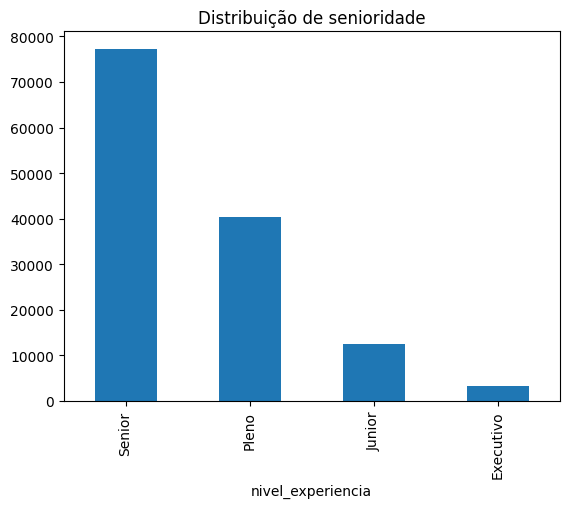

In [103]:
df_limpo['nivel_experiencia'].value_counts().plot(kind='bar',title='Distribuição de senioridade')

In [104]:
import seaborn as sns

<Axes: xlabel='nivel_experiencia', ylabel='usd'>

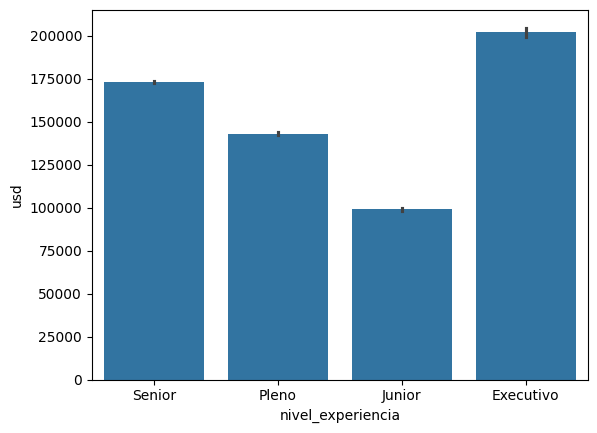

In [105]:
sns.barplot(data=df_limpo, x='nivel_experiencia', y='usd')

In [106]:
import matplotlib.pyplot as plt

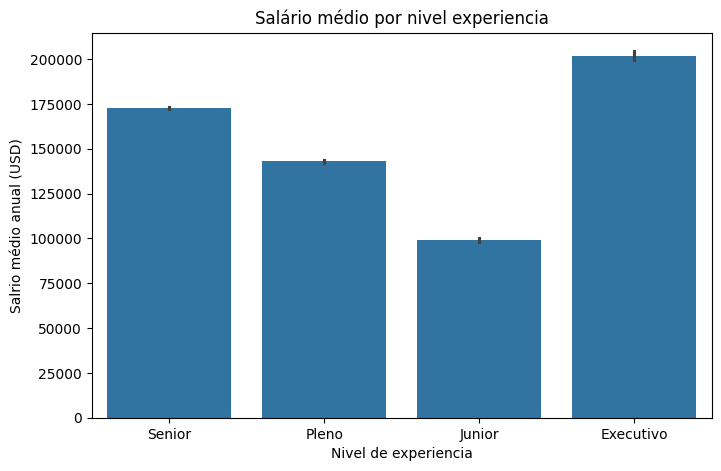

In [107]:
plt.figure(figsize=(8, 5)) # Definir tamanho da imagem
sns.barplot(data=df_limpo, x='nivel_experiencia', y='usd')
plt.title('Salário médio por nivel experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salrio médio anual (USD)')
plt.show()

In [108]:
ordem = df_limpo.groupby('nivel_experiencia')['usd'].mean().sort_values(ascending=True).index
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='nivel_experiencia')

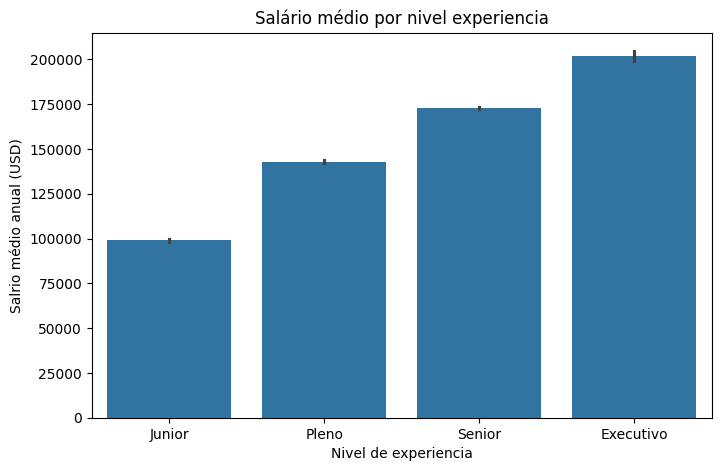

In [109]:
plt.figure(figsize=(8, 5)) # Definir tamanho da imagem
sns.barplot(data=df_limpo, x='nivel_experiencia', y='usd', order=ordem)
plt.title('Salário médio por nivel experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salrio médio anual (USD)')
plt.show()

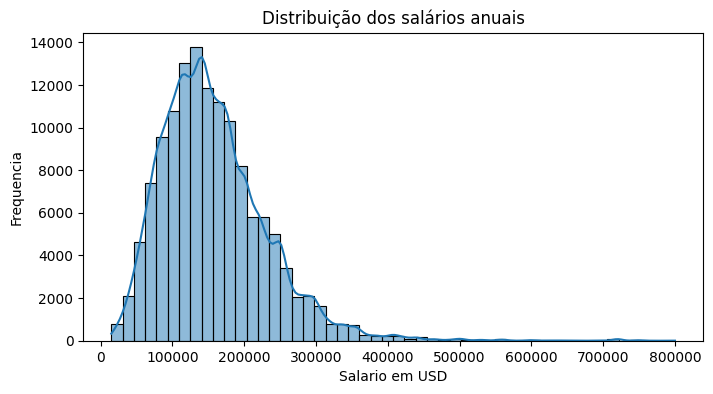

In [110]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salario em USD')
plt.ylabel('Frequencia')
plt.show()

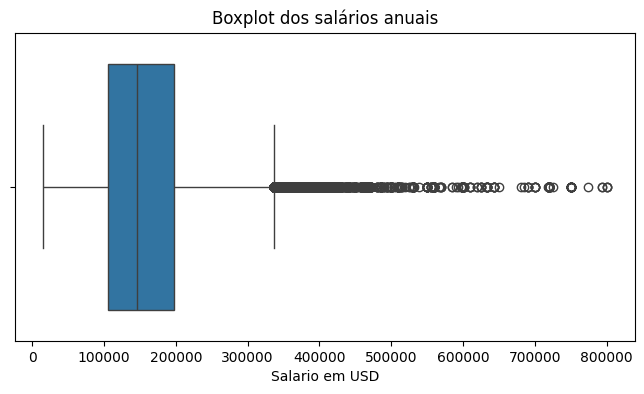

In [111]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot dos salários anuais')
plt.xlabel('Salario em USD')
plt.show()

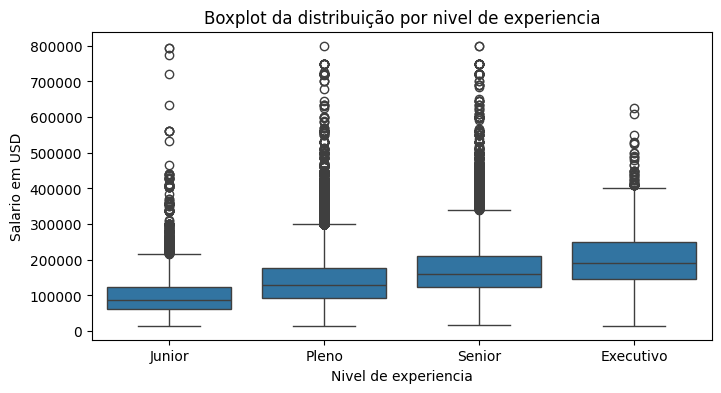

In [112]:
ordem_experiencia = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,4))
sns.boxplot(x='nivel_experiencia', y='usd', data=df_limpo, order=ordem_experiencia)
plt.title('Boxplot da distribuição por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario em USD')
plt.show()

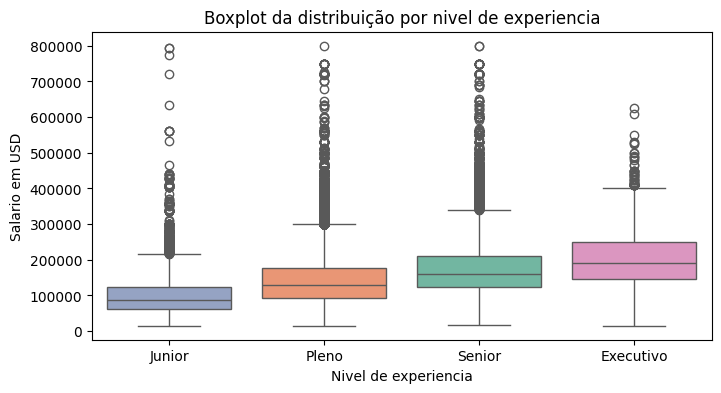

In [113]:
ordem_experiencia = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,4))
sns.boxplot(x='nivel_experiencia', y='usd', data=df_limpo, order=ordem_experiencia, palette='Set2', hue='nivel_experiencia')
plt.title('Boxplot da distribuição por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario em USD')
plt.show()

In [114]:
import plotly.express as px

In [115]:
media_salario_por_nivel = df_limpo.groupby('nivel_experiencia')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(media_salario_por_nivel,
             x='nivel_experiencia',
             y='usd',
             title='Média Salarial por Nível de Experiência',
             labels={'nivel_experiencia': 'Nível de Experiência', 'usd': 'Média Salarial (USD)'})

# fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Junior', 'Pleno', 'Senior', 'Executivo']})

fig.show()

In [117]:
remoto_contagem = df_limpo['remoto'].value_counts(ascending=True).reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'
             )
fig.show()

In [118]:
remoto_contagem = df_limpo['remoto'].value_counts(ascending=True).reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
             )
fig.show()

In [119]:
remoto_contagem = df_limpo['remoto'].value_counts(ascending=True).reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
             )
fig.update_traces(textinfo='percent+label')
fig.show()

In [132]:
# TODO: Fazer salario por pais pelo cargo de data scients (Salario medio por pais)
df_data_scientists = df_limpo.query('cargo == "Data Scientist"')
df_data_scientists

,ano,nivel_experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
6,2025,Senior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Media
7,2025,Senior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Media
8,2025,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Media
9,2025,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Media
65,2025,Senior,Tempo Integral,Data Scientist,258000,USD,258000,US,Presencial,US,Media
...,...,...,...,...,...,...,...,...,...,...,...
133339,2021,Senior,Tempo Integral,Data Scientist,168000,USD,168000,JP,Presencial,JP,Pequeno
133340,2021,Pleno,Tempo Integral,Data Scientist,160000,SGD,119059,SG,Remoto,IL,Media
133344,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133346,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequeno


In [131]:
df_limpo['cargo'].value_counts()

,count
cargo,
Data Scientist,17311
Software Engineer,15006
Data Engineer,14868
Data Analyst,12381
Engineer,9454
...,...
Quantitative Research Analyst,1
Data Science Tech Lead,1
Staff Machine Learning Engineer,1


In [138]:
df_data_scientists_por_pais = df_data_scientists.groupby('empresa')['usd'].mean().sort_values(ascending=False).reset_index()
df_data_scientists_por_pais.columns = ['País', 'usd']
fig = px.bar(df_data_scientists_por_pais,
             x='País',
             y='usd',
             title='Média Salarial por País'
             )

fig.show()

Uma outra maneira de fazer é utilizando o pycountry e fazer um grafico por pais de maneira mais simplificada de realizar.

In [ ]:
!pip install pycountry

In [ ]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()